<a href="https://colab.research.google.com/github/vukrosic/become-ai-researcher/blob/main/Positional_embeddings%2C_Multihead_attention_%26_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

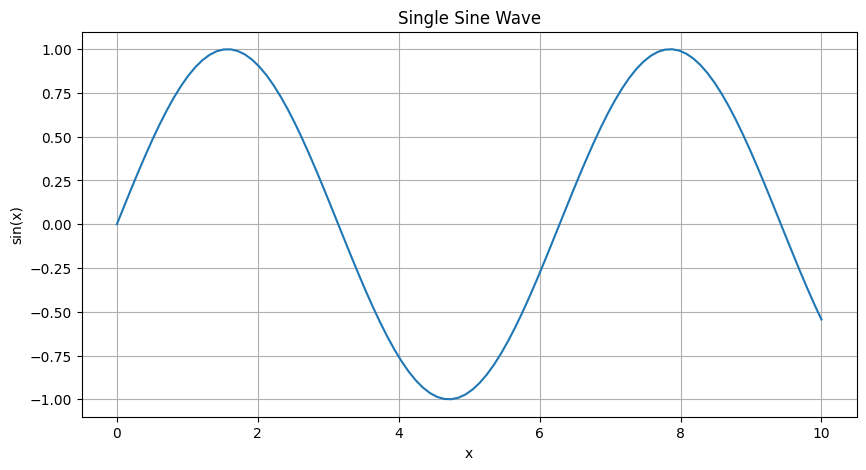

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0, 10, 100)

# Calculate sine wave
y = np.sin(x)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.title("Single Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True)
plt.show()

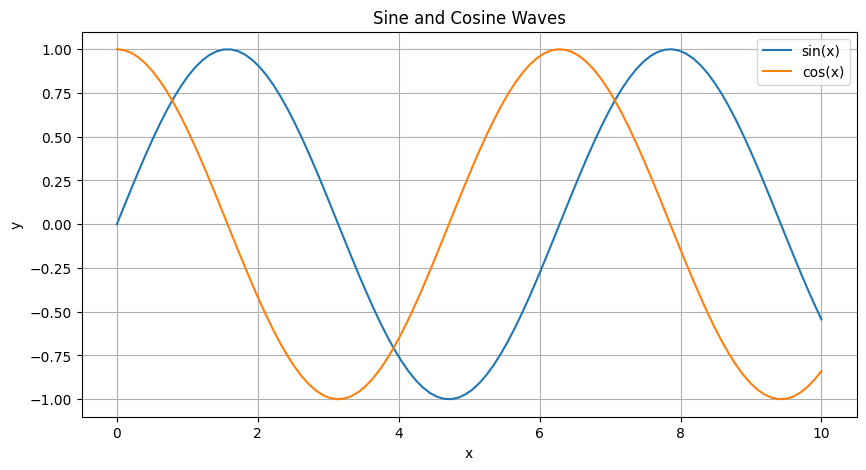

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0, 10, 100)

# Calculate sine and cosine waves
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y_sin, label='sin(x)')
plt.plot(x, y_cos, label='cos(x)')
plt.title("Sine and Cosine Waves")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

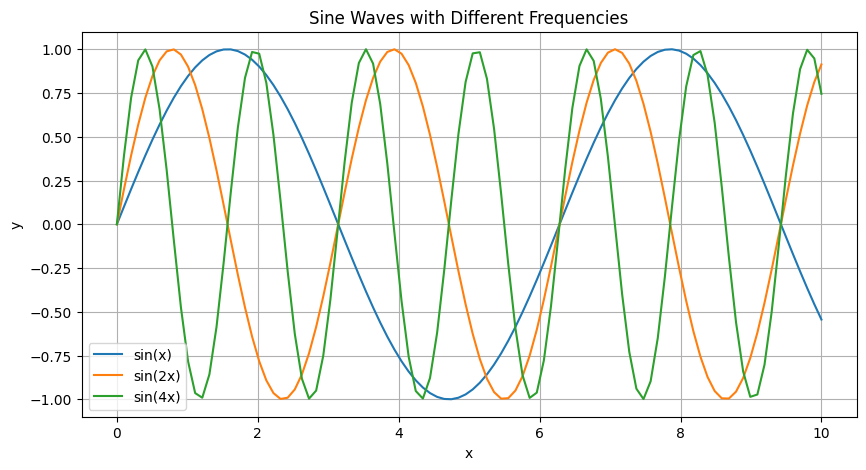

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0, 10, 100)

# Calculate sine waves with different frequencies
y1 = np.sin(x)
y2 = np.sin(2*x)
y3 = np.sin(4*x)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='sin(2x)')
plt.plot(x, y3, label='sin(4x)')
plt.title("Sine Waves with Different Frequencies")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

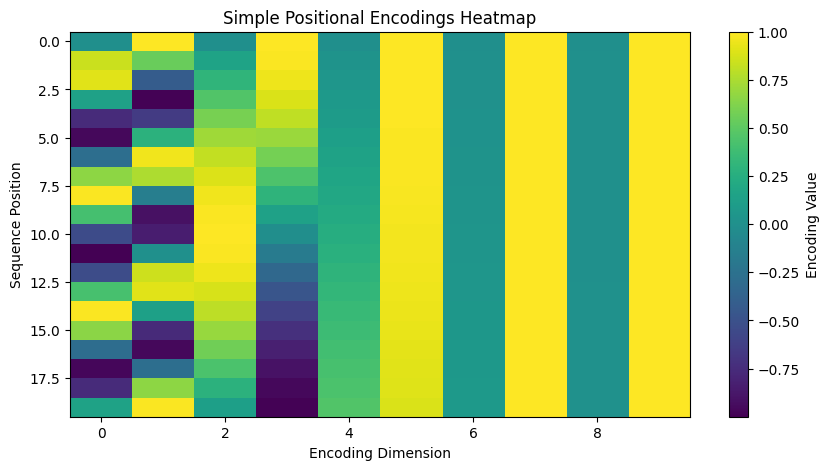

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate simple positional encodings
seq_len = 20
dim = 10
pos_enc = np.zeros((seq_len, dim))

for pos in range(seq_len):
    for i in range(dim):
      # pos_enc[pos, i] = 1
      # pos_enc[pos, i] = pos
      #pos_enc[pos, i] = np.sin(pos)
      if i % 2 == 0:
          # pos_enc[pos, i] = np.sin(pos)
          pos_enc[pos, i] = np.sin(pos / (10000 ** (i / dim)))
      else:
          #pos_enc[pos, i] = np.cos(pos)
          pos_enc[pos, i] = np.cos(pos / (10000 ** ((i - 1) / dim)))

# Plot heatmap
plt.figure(figsize=(10, 5))
plt.imshow(pos_enc, cmap='viridis', aspect='auto')
plt.colorbar(label='Encoding Value')
plt.title("Simple Positional Encodings Heatmap")
plt.xlabel("Encoding Dimension")
plt.ylabel("Sequence Position")
plt.show()

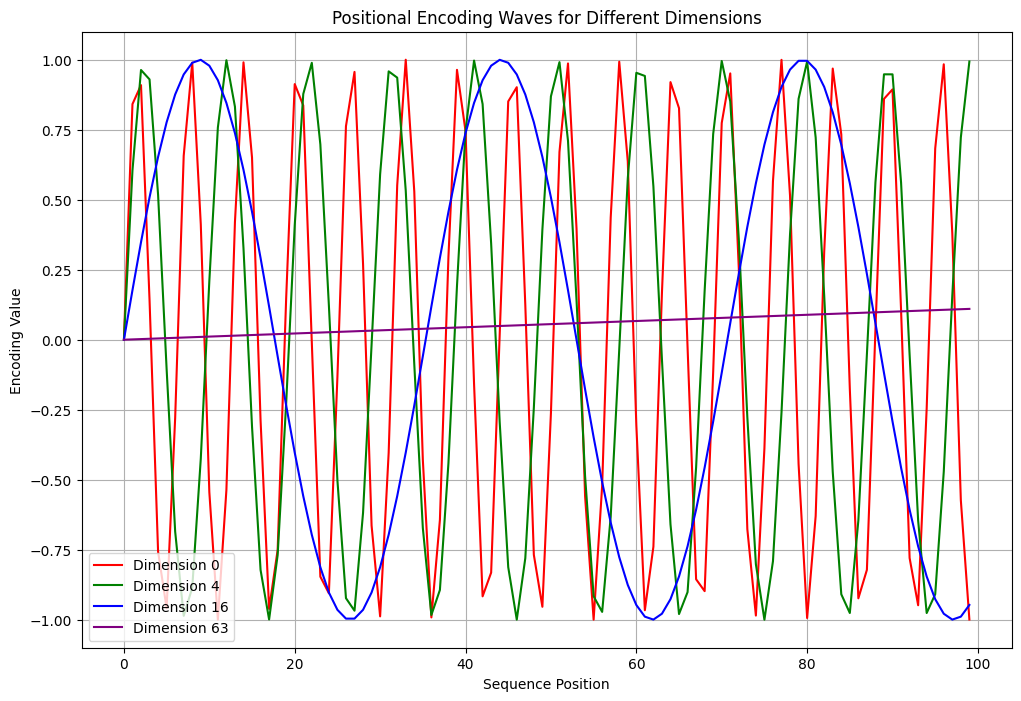

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(pos, i, d_model):
    return np.sin(pos / (1000 ** (i / d_model)))

seq_len = 100
d_model = 64

plt.figure(figsize=(12, 8))

# Plot for a few selected dimensions
dimensions = [0, 4, 16, 63]  # Low to high dimensions
colors = ['r', 'g', 'b', 'purple']

for dim, color in zip(dimensions, colors):
    positions = np.arange(seq_len)
    encodings = [positional_encoding(pos, dim, d_model) for pos in positions]
    plt.plot(positions, encodings, color=color, label=f'Dimension {dim}')

plt.title("Positional Encoding Waves for Different Dimensions")
plt.xlabel("Sequence Position")
plt.ylabel("Encoding Value")
plt.legend()
plt.grid(True)
plt.show()

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42],
        [43],
        [44],
        [45],
        [46],
        [47],
        [48],
        [49]])
tensor([1.0000e+00, 3.1623e-01, 1.0000e-01, 3.1623e-02, 1.0000e-02, 3.1623e-03,
        1.0000e-03, 3.1623e-04])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

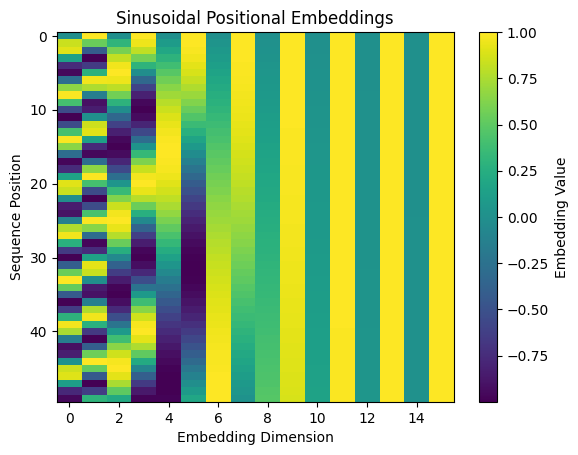

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Positional Embedding Basics
def get_sinusoidal_embeddings(seq_len, dim):
    """Generates sinusoidal positional embeddings"""
    positions = torch.arange(seq_len).unsqueeze(1)  # positions (seq_len, 1)
    print(positions)
    div_term = torch.exp(torch.arange(0, dim, 2) * -(np.log(10000.0) / dim))  # dim scaling
    print(div_term)
    pe = torch.zeros(seq_len, dim)
    print(pe)
    pe[:, 0::2] = torch.sin(positions * div_term)  # apply sin to even indices
    pe[:, 1::2] = torch.cos(positions * div_term)  # apply cos to odd indices
    return pe

# Visualization
seq_len = 50
dim = 16
embeddings = get_sinusoidal_embeddings(seq_len, dim)
plt.imshow(embeddings.numpy(), aspect='auto', cmap='viridis')
plt.colorbar(label='Embedding Value')
plt.title("Sinusoidal Positional Embeddings")
plt.xlabel("Embedding Dimension")
plt.ylabel("Sequence Position")
plt.show()


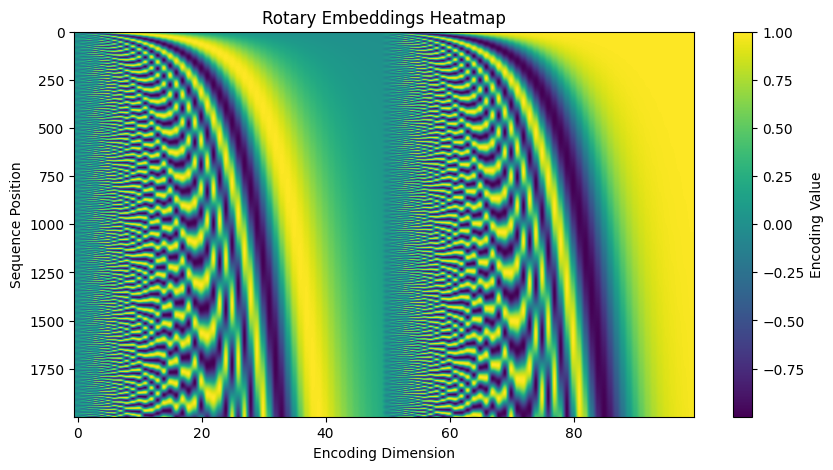

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
seq_len = 2000  # Length of the sequence
dim = 100  # Dimensionality of the embeddings
theta = 10000.0  # Hyperparameter controlling the frequency of the embeddings

# Generate base for rotary embeddings
def get_rotary_embeddings(seq_len, dim, theta):
    """
    Compute rotary embeddings for a given sequence length and dimensionality.

    Rotary embeddings are a type of positional encoding that uses a combination of sine and cosine functions
    to encode the position of each element in a sequence.

    Args:
        seq_len (int): Length of the sequence.
        dim (int): Dimensionality of the embeddings.
        theta (float): Hyperparameter controlling the frequency of the embeddings.

    Returns:
        rotary_emb (np.ndarray): Rotary embeddings for the given sequence length and dimensionality.
    """
    # Create an array of positions from 0 to seq_len - 1
    position = np.arange(seq_len)

    # Create an array of dimensions from 0 to dim // 2 - 1 (integer division)
    dims = np.arange(dim // 2)

    # Compute the angles for each position and dimension
    # The formula is: angle = position / theta ^ (2 * dim / dim)
    # This is equivalent to: angle = position / theta ^ (2 * i / dim) for each dimension i
    angles = position[:, np.newaxis] / theta ** (2 * dims[np.newaxis, :] / dim)

    # Compute the sine and cosine of the angles
    # These will be used to create the rotary embeddings
    emb_sin = np.sin(angles)
    emb_cos = np.cos(angles)

    # Concatenate the sine and cosine embeddings along the last axis
    # This creates a single array with shape (seq_len, dim)
    rotary_emb = np.concatenate([emb_sin, emb_cos], axis=-1)

    return rotary_emb

# Generate rotary embeddings
rotary_emb = get_rotary_embeddings(seq_len, dim, theta)

# Plot heatmap
plt.figure(figsize=(10, 5))
plt.imshow(rotary_emb, cmap='viridis', aspect='auto')
plt.colorbar(label='Encoding Value')
plt.title("Rotary Embeddings Heatmap")
plt.xlabel("Encoding Dimension")
plt.ylabel("Sequence Position")
plt.show()

Self attention

In [37]:
import torch
import torch.nn as nn
import math

def simple_attention(query, key, value):
    # Calculate attention scores
    attention_scores = torch.matmul(query, key.transpose(-2, -1))
    print(attention_scores.shape)
    # Apply softmax to get attention weights
    attention_weights = torch.softmax(attention_scores, dim=-1)
    print(attention_weights.shape)
    # Apply attention weights to values
    output = torch.matmul(attention_weights, value)
    print(output.shape)
    return output

# Example usage
query = torch.randn(1, 3, 4)  # (batch_size, query_len, d_model)
key = torch.randn(1, 5, 4)    # (batch_size, key_len, d_model)
value = torch.randn(1, 5, 4)  # (batch_size, value_len, d_model)

output = simple_attention(query, key, value)
print("Output:")
print(output.shape)  # Should be (1, 3, 4)
print(output)

torch.Size([1, 3, 5])
torch.Size([1, 3, 5])
torch.Size([1, 3, 4])
Output:
torch.Size([1, 3, 4])
tensor([[[-0.1273, -0.3606,  1.5349,  0.9845],
         [-0.2812,  0.1794,  0.7794,  0.3412],
         [-0.0832,  0.0951,  0.3608,  0.1167]]])


In [38]:
class SingleHeadAttention(nn.Module):
    def __init__(self, d_model):
        super(SingleHeadAttention, self).__init__()
        self.d_model = d_model

        # Linear layers for transforming query, key, and value
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)

    def forward(self, query, key, value):
        # Transform query, key, and value
        Q = self.W_q(query)
        K = self.W_k(key)
        V = self.W_v(value)

        # Scaled dot-product attention
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_model)
        attention_weights = torch.softmax(attention_scores, dim=-1)
        output = torch.matmul(attention_weights, V)

        return output

# Example usage
d_model = 4
attention = SingleHeadAttention(d_model)

query = torch.randn(1, 3, d_model)  # (batch_size, query_len, d_model)
key = torch.randn(1, 5, d_model)    # (batch_size, key_len, d_model)
value = torch.randn(1, 5, d_model)  # (batch_size, value_len, d_model)

output = attention(query, key, value)
print(output.shape)  # Should be (1, 3, 4)

torch.Size([1, 3, 4])


In [39]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        # Linear layers for transforming query, key, and value
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)

        # Output linear layer
        self.W_o = nn.Linear(d_model, d_model)

    def split_heads(self, x):
        # Reshape to (batch_size, seq_len, num_heads, d_k)
        batch_size, seq_len, _ = x.size()
        return x.view(batch_size, seq_len, self.num_heads, self.d_k).transpose(1, 2)

    def forward(self, query, key, value):
        # Transform and split query, key, and value
        Q = self.split_heads(self.W_q(query))
        K = self.split_heads(self.W_k(key))
        V = self.split_heads(self.W_v(value))

        # Scaled dot-product attention for each head
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        attention_weights = torch.softmax(attention_scores, dim=-1)
        head_outputs = torch.matmul(attention_weights, V)

        # Concatenate heads and apply output transformation
        head_outputs = head_outputs.transpose(1, 2).contiguous().view(query.size(0), -1, self.d_model)
        output = self.W_o(head_outputs)

        return output

# Example usage
d_model = 8
num_heads = 2
attention = MultiHeadAttention(d_model, num_heads)

query = torch.randn(1, 3, d_model)  # (batch_size, query_len, d_model)
key = torch.randn(1, 5, d_model)    # (batch_size, key_len, d_model)
value = torch.randn(1, 5, d_model)  # (batch_size, value_len, d_model)

output = attention(query, key, value)
print(output.shape)  # Should be (1, 3, 8)

torch.Size([1, 3, 8])


CNN

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [41]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()

        # First convolutional layer
        # Input: 1 channel (grayscale image)
        # Output: 16 feature maps
        # Kernel size: 3x3
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        # Assuming input image size is 28x28 (like MNIST)
        self.fc = nn.Linear(16 * 14 * 14, num_classes)

    def forward(self, x):
        # Apply convolution, then ReLU activation, then pooling
        x = self.pool(F.relu(self.conv1(x)))

        # Flatten the output for the fully connected layer
        x = x.view(-1, 16 * 14 * 14)

        # Apply the fully connected layer
        x = self.fc(x)
        return x

# Example usage
model = SimpleCNN(num_classes=10)  # For MNIST dataset (10 digits)
sample_input = torch.randn(1, 1, 28, 28)  # (batch_size, channels, height, width)
output = model(sample_input)
print(output.shape)  # Should be (1, 10)

torch.Size([1, 10])


In [42]:
class DeepCNN(nn.Module):
    def __init__(self, num_classes):
        super(DeepCNN, self).__init__()

        # First convolutional layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)

        # Second convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Third convolutional layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, num_classes)

        # Dropout layer for regularization
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Apply convolutions with ReLU activation and pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Flatten the output for the fully connected layers
        x = x.view(-1, 128 * 3 * 3)

        # Apply fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Example usage
model = DeepCNN(num_classes=10)
sample_input = torch.randn(1, 1, 28, 28)
output = model(sample_input)
print(output.shape)  # Should be (1, 10)

torch.Size([1, 10])


In [43]:
class BatchNormCNN(nn.Module):
    def __init__(self, num_classes):
        super(BatchNormCNN, self).__init__()

        # First convolutional block
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        # Second convolutional block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Third convolutional block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, num_classes)

        # Dropout layer for regularization
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Apply convolutions with BatchNorm, ReLU activation and pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))

        # Flatten the output for the fully connected layers
        x = x.view(-1, 128 * 3 * 3)

        # Apply fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Example usage
model = BatchNormCNN(num_classes=10)
sample_input = torch.randn(1, 1, 28, 28)
output = model(sample_input)
print(output.shape)  # Should be (1, 10)

torch.Size([1, 10])
